In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import seaborn as sns
from tensorflow.keras import layers

In [29]:
df = pd.read_csv(r'F:\AAA Machine Learning\Macine Hack\Data Science South\train.csv')
df.sample(5)

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,...,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
43980,55844,3,BHK,Independent House,Vasant Vihar,20497,682,Semi-Furnished,2,Delhi,...,17,0,0,1,1,0,81988,1,1,3400
64808,151160,1,RK,Apartment,Thakur complex,29417,585,Unfurnished,2,Mumbai,...,2,1,1,0,0,0,294170,1,0,3400
105503,38827,2,BHK,Apartment,Lingarajapuram,41043,731,Furnished,2,Bangalore,...,4,1,0,0,1,1,410430,1,0,3500
131369,123961,2,BHK,Villa,Bhandup East,12522,1085,Furnished,2,Mumbai,...,2,0,0,0,1,1,25044,1,0,800
76192,21206,3,BHK,Independent House,Mahadevapura,12730,1116,Furnished,2,Bangalore,...,7,0,0,0,1,1,25460,1,1,1300


# Check Null Values

In [30]:
df.isnull().sum()

Property_ID         0
room                0
layout_type         0
property_type       0
locality            0
price               0
area                0
furnish_type        0
bathroom            0
city                0
parking_spaces      0
floor               0
pet_friendly        0
power_backup        0
washing_machine     0
air_conditioner     0
geyser/solar        0
security_deposit    0
CCTV/security       0
lift                0
neighbourhood       0
dtype: int64

In [31]:
df.columns

Index(['Property_ID', 'room', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom', 'city', 'parking_spaces',
       'floor', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security',
       'lift', 'neighbourhood'],
      dtype='object')

In [32]:
df = df.drop(columns=['Property_ID', 'layout_type', 'property_type', 'locality',
        'furnish_type', 'bathroom', 'city', 'parking_spaces',
       'floor', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security',
       'lift', 'neighbourhood'],axis=1)

In [33]:
df.head()

,room,price,area
0,3,33624,1312
1,1,9655,1474
2,3,23699,1837
3,1,6306,606
4,1,12008,498


In [34]:
columns_titles = ["area","room","price"]
df=df.reindex(columns=columns_titles)

In [35]:
df.head()

,area,room,price
0,1312,3,33624
1,1474,1,9655
2,1837,3,23699
3,606,1,6306
4,498,1,12008


In [36]:
df.describe()

,area,room,price
count,134683.000000,134683.000000,134683.000000
mean,1480.388490,2.029677,36690.033894
std,1412.464718,0.937308,62620.364025
min,81.000000,1.000000,1583.000000
25%,759.000000,1.000000,12035.500000
50%,1114.000000,2.000000,20856.000000
75%,1580.000000,3.000000,36014.000000
max,13942.000000,5.000000,799325.000000


In [37]:
df.corr()

,area,room,price
area,1.000000,0.063588,0.020436
room,0.063588,1.000000,0.054031
price,0.020436,0.054031,1.000000


In [38]:
from sklearn.preprocessing import MinMaxScaler

sx = MinMaxScaler()
sy = MinMaxScaler()


scaled_x = sx.fit_transform(df.drop('price',axis=1))
scaled_x

array([[0.08881033, 0.5       ],
       [0.1004978 , 0.        ],
       [0.12668639, 0.5       ],
       ...,
       [0.15857442, 0.5       ],
       [0.08895462, 0.        ],
       [0.05172787, 0.        ]])

In [39]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.04016461],
       [0.01011856],
       [0.02772325],
       ...,
       [0.10558426],
       [0.01797072],
       [0.04442288]])

In [40]:
w = np.ones(shape=(2))
print(w)

[1. 1.]


In [90]:
def batch_gradient_descent(X,y_true,epochs,learning_rate = 0.01):
    number_of_features = X.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b = 0 
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w,scaled_x.T) + b # w1 * area + w2 * bedrooms
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate* w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    
    
    return w,b,cost,cost_list,epoch_list


w,b,cost,cost_list_batch,epoch_list_batch = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost
            

(array([0.87508521, 0.54794129]), -0.19395059170010545, 0.030791451582920848)

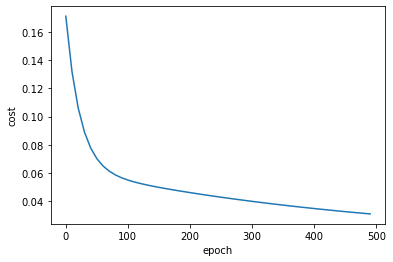

In [91]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_batch,cost_list_batch)

In [92]:
sx.transform([[2600,4]])

array([[0.18173292, 0.75      ]])

In [93]:
sy.inverse_transform([[1,0.5 ,0]])

array([[799325., 400454.,   1583.]])

In [94]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area,bedrooms]])[0]
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(1000,2,w,b)

2423.716855275122

In [95]:
predict(1200,3,w,b)

121775.41549306257

# Stochastic Gradient Descent

In [96]:
import random
random.randint(0,6)

4

In [97]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        random_index = random.randint(0,total_samples-1)
        
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w,sample_x.T) + b # w1 * area + w2 * bedrooms
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
        w = w - learning_rate* w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(sample_y-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    
        
    return w,b,cost,cost_list,epoch_list
        
        
w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w_sgd,b_sgd,cost_sgd

(array([0.99999698, 0.99999051]),
 -2.2651419943759597e-05,
 0.005987395386742026)

In [98]:
w,b,cost

(array([0.87508521, 0.54794129]), -0.19395059170010545, 0.030791451582920848)

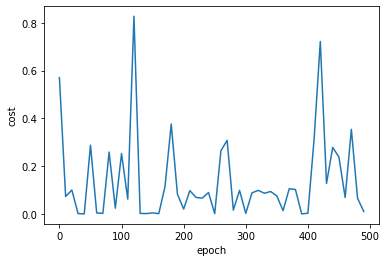

In [99]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [100]:
predict(1000,2,w_sgd,b_sgd)

253889.57502307036

# Mini Batch Gradient Descent

In [101]:
random.sample(range(0, 100-1), 5)

[33, 74, 37, 51, 54]

In [102]:
def mini_batch_gradient_descent(X,y_true,epochs,learning_rate=0.01,batch_size=10):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        random_index = random.sample(range(0, total_samples-1), batch_size)
        
        
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w,sample_x.T) + b # w1 * area + w2 * bedrooms
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
        w = w - learning_rate* w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(sample_y-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list


w_mini,b_mini,cost_mini,cost_list_mini,epoch_list_mini = mini_batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500,20)
w_mini,b_mini,cost_mini
    

(array([0.96168841, 0.86322305]), -0.2237709926372059, 0.05531822018719627)

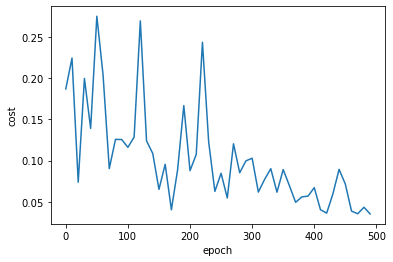

In [103]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_mini,cost_list_mini)

# Comparison Of threes 

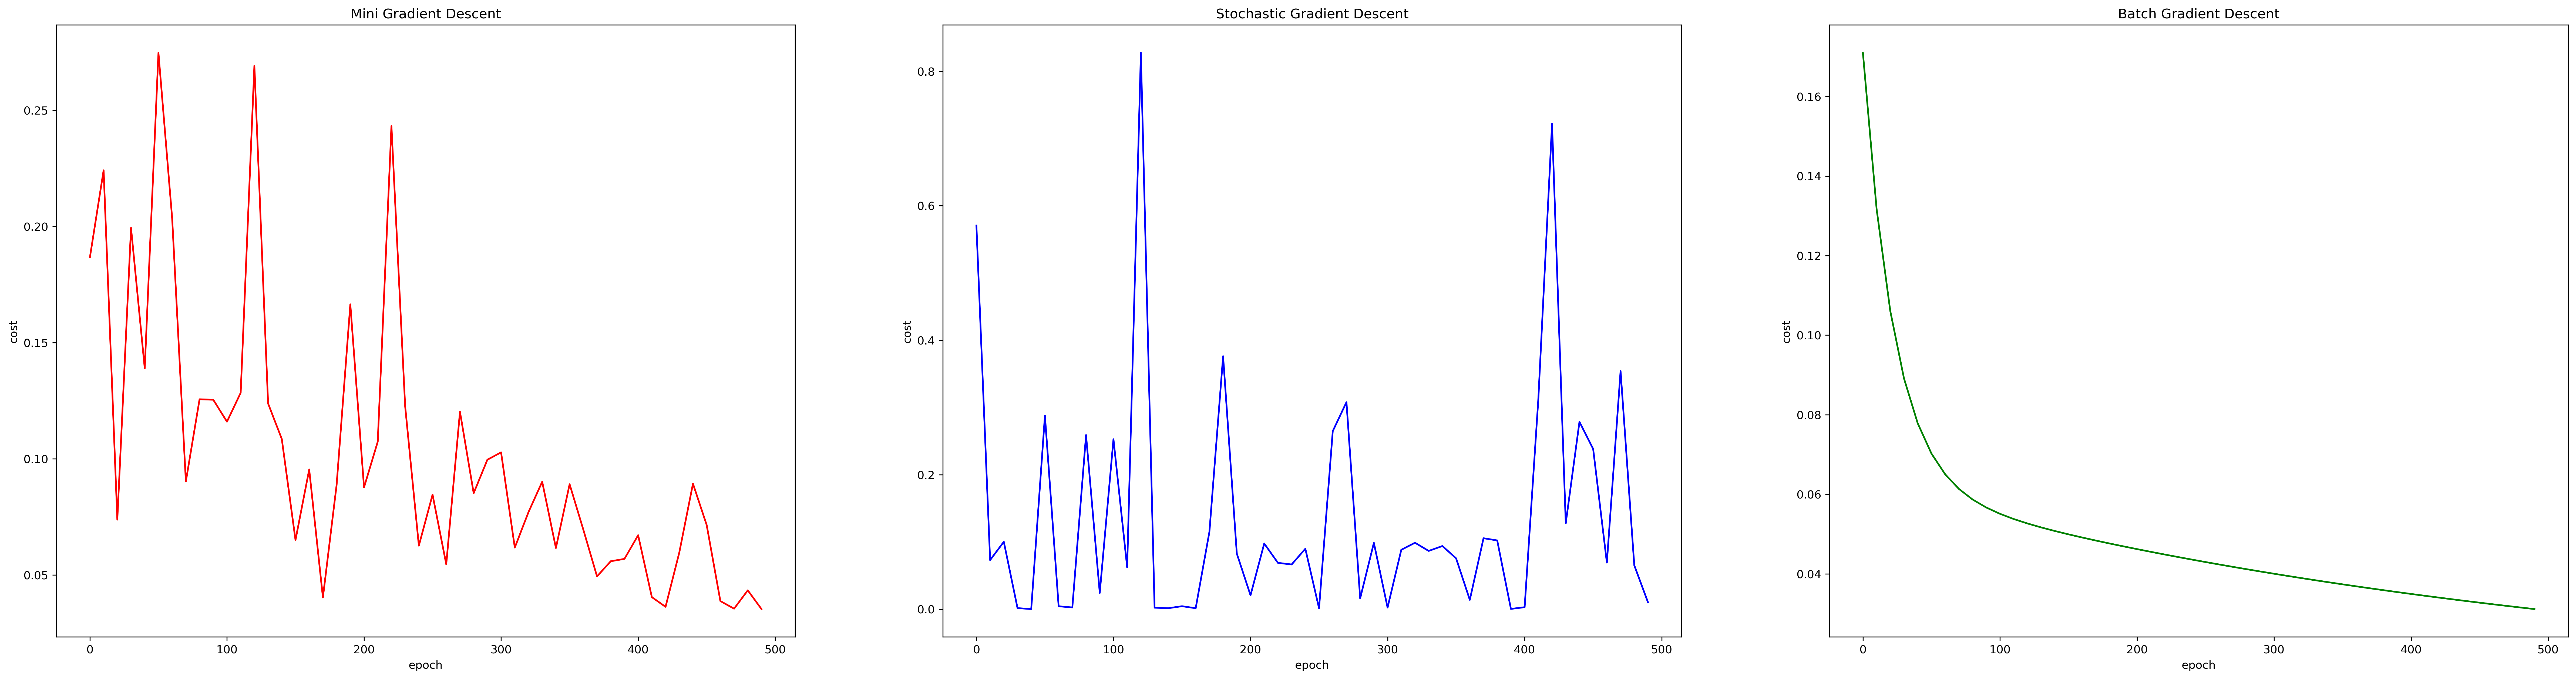

In [108]:
plt.figure(figsize=(40,10),dpi=300)
plt.subplot(1,3,1)
plt.title("Mini Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_mini,cost_list_mini,'r')

plt.subplot(1,3,2)
plt.title("Stochastic Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd,'b')


plt.subplot(1,3,3)
plt.title("Batch Gradient Descent")
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_batch,cost_list_batch,'g')

